In [389]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cv2


The first dataset - NYC AIRBNB PRICE in 2019

Import and examine the data

In [390]:
airbnb = pd.read_csv("./AB_NYC_2019.csv")
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Data Cleaning

In [391]:
#check the data types and number of non-null values
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [392]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

last_review, reviews_per_month col have the same number of null values most likely because tenants did not leave a review after staying in the airbnbs
name and host name have missing values but these are not likely to be used as features 

The last_review column tells us the data the airbnb was last reviewed which does not add a lot of insight to the analysis therefore this column can be dropped as well as the listing_id,host_name,name.
The name column is a description of the property but it is not standardised as it is at the owners discretion in what they write. Therefore this column will be dropped
The number of review per month is a better indicator of how popular a listing is therefore going to replace the null values with 0

In [393]:
airbnb['reviews_per_month'].replace(to_replace=np.nan, value=0, inplace=True)
airbnb['host_name'].replace(to_replace=np.nan, value='Unknown', inplace=True)



In [394]:
airbnb.drop(['id','last_review','name'],inplace=True,axis =1)


In [395]:
airbnb.drop('neighbourhood',axis=1,inplace=True)


In [396]:
print(airbnb.isnull().sum())
airbnb.head()

host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64


,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,4869,LisaRoxanne,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


Have succesfully removed null values and dropped the columns that were not necessary too keep

Checking the value counts in the categoric columsn such as neighbourhood_group and room type
Should only be 5 boroughs and 3 room types

In [397]:
airbnb['neighbourhood_group'].value_counts()

Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: neighbourhood_group, dtype: int64

In [398]:
airbnb['room_type'].value_counts()

Entire home/apt    25409
Private room       22326
Shared room         1160
Name: room_type, dtype: int64

Find Outliers and decide if they need to be removed or not!

Text(0.5, 1.0, 'reviews_per_month')

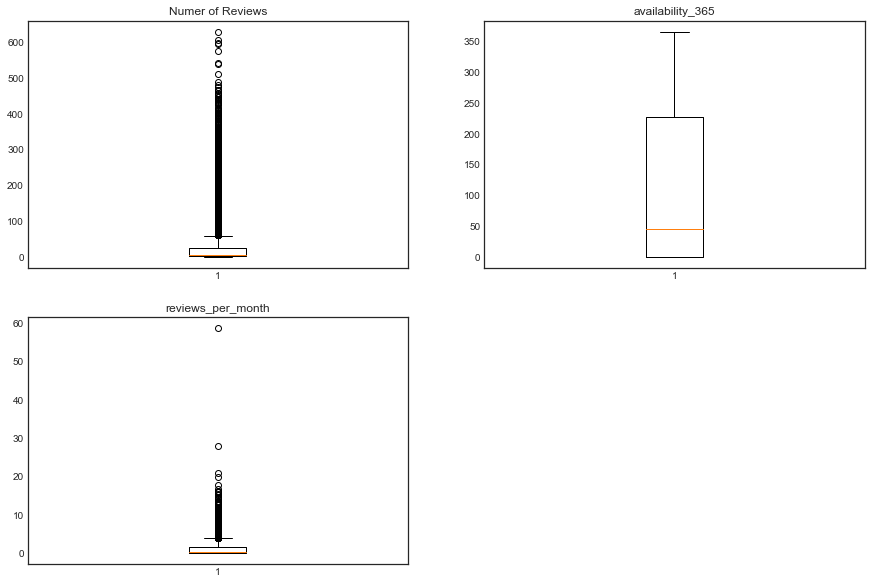

In [399]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(airbnb['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(223)
plt.boxplot(airbnb['reviews_per_month'])
ax.set_title('reviews_per_month')

The number of reviews,price and reviews per month features have a large amount of outliers which should be removed as the number is significant enough to affect the data analysis.
Outliers = 1.5 x IQR above the 3rd or below first quartile
Minimum,Q1,Meidian,Q3,Maximum

Use 5 number summary to determine outliers and remove them

In [400]:


Q1 = airbnb['number_of_reviews'].quantile(0.25)
Q3 = airbnb['number_of_reviews'].quantile(0.75)
IQR = Q3 - Q1 

filter = (airbnb['number_of_reviews'] >= Q1 - 1.5 * IQR) & (airbnb['number_of_reviews'] <= Q3 + 1.5 *IQR)
airbnb1=airbnb.loc[filter]


Q1 = airbnb1['reviews_per_month'].quantile(0.25)
Q3 = airbnb1['reviews_per_month'].quantile(0.75)
IQR = Q3 - Q1    #IQR is interquartile range. 

filter = (airbnb1['reviews_per_month'] >= Q1 - 1.5 * IQR) & (airbnb1['reviews_per_month'] <= Q3 + 1.5 *IQR)

airbnb2 = airbnb1.loc[filter]

Q1 = airbnb2['price'].quantile(0.25)
Q3 = airbnb2['price'].quantile(0.75)
IQR = Q3 - Q1 

filter = (airbnb2['price'] >= Q1 - 1.5 * IQR) & (airbnb2['price'] <= Q3 + 1.5 *IQR)

airbnb_new=airbnb2.loc[filter]


In [401]:
#Drop rows where price is 0
airbnb_new = airbnb_new[airbnb_new.price != 0]

airbnb_new


,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,John,Brooklyn,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Jennifer,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Elisabeth,Manhattan,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
4,7192,Laura,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
6,7356,Garon,Brooklyn,40.68688,-73.95596,Private room,60,45,49,0.40,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,8232441,Sabrina,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.00,2,9
48891,6570630,Marisol,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.00,2,36
48892,23492952,Ilgar & Aysel,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.00,1,27
48893,30985759,Taz,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.00,6,2


Text(0.5, 1.0, 'reviews_per_month')

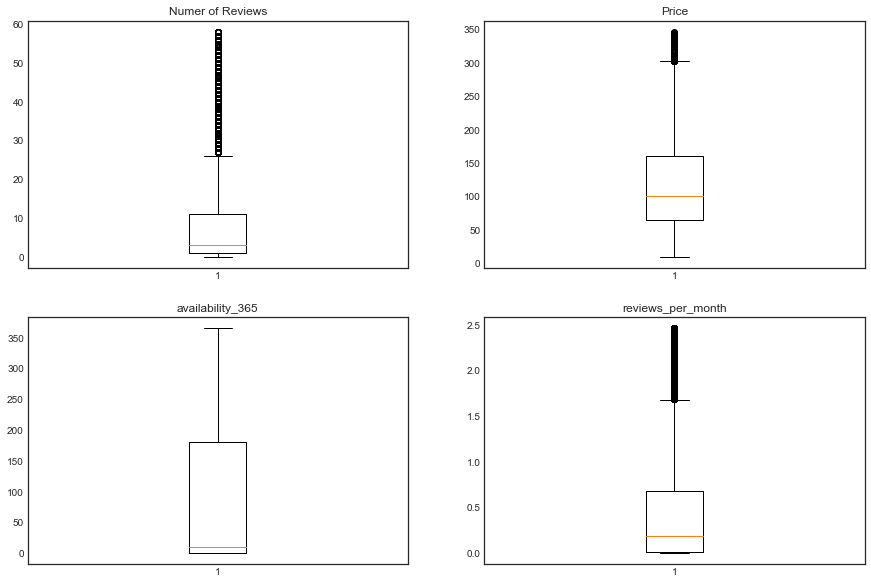

In [402]:
plt.figure(figsize = (15, 10))
ax=plt.subplot(221)
plt.boxplot(airbnb_new['number_of_reviews'])
ax.set_title('Numer of Reviews')
ax=plt.subplot(222)
plt.boxplot(airbnb_new['price'])
ax.set_title('Price')
ax=plt.subplot(223)
plt.boxplot(airbnb_new['availability_365'])
ax.set_title('availability_365')
ax=plt.subplot(224)
plt.boxplot(airbnb_new['reviews_per_month'])
ax.set_title('reviews_per_month')

In [403]:
airbnb_new.to_csv('airbnb_new.csv',index=False)

A lot of the outliers have been removed

Adding a col that categorises the price into 3 labels
Do this by looking at median value of the price

In [404]:
#median quartile and 3rd quartile of price

airbnb_new['price'].describe()


count    36204.000000
mean       121.062120
std         69.302925
min         10.000000
25%         65.000000
50%        100.000000
75%        160.000000
max        346.000000
Name: price, dtype: float64

In [405]:
#Classify the price of an airbnb into 3 categories: cheap, medium and expensive
airbnb_new['price_category'] = pd.cut(airbnb_new['price'], bins=[0, 100, 160, 1000], labels=['cheap', 'medium', 'expensive'])
print(airbnb_new['price_category'].value_counts())

cheap        18672
expensive     8891
medium        8641
Name: price_category, dtype: int64


Data Visualization

In [406]:
# airbnb where price is 0
airbnb_new[airbnb_new['price'] == 0]


,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category


In [407]:
img = plt.imread('./nyc.png')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


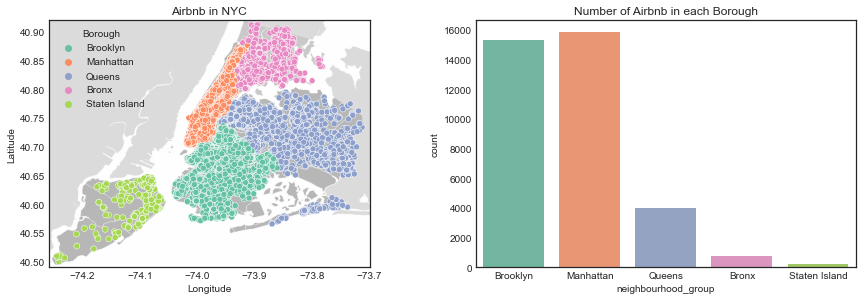

In [408]:
#plot a subplot of longitude and latitude by borough and a count plot of  number of airbnb in each borough

plt.figure(figsize=(15,10))
ax = plt.subplot(221)

sns.scatterplot(x='longitude', y='latitude', data=airbnb_new,ax=ax,hue='neighbourhood_group',palette='Set2')
plt.title('Airbnbs in NYC Boroughs')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(loc='upper left',title = 'Borough')
ax.imshow(img, extent=[-74.258, -73.7, 40.49, 40.92], alpha=0.5)

plt.subplot(222)
sns.countplot(airbnb_new.neighbourhood_group,palette='Set2')
plt.title('Number of Airbnbs in each Borough')
plt.savefig('./plots/airbnb_counts_subplot',bbox_inches='tight')

In [431]:
#percentage of airbnbs in each borough
airbnb_new['neighbourhood_group'].value_counts(normalize=True)*100

Manhattan        43.801790
Brooklyn         42.337863
Queens           11.095459
Bronx             2.071594
Staten Island     0.693294
Name: neighbourhood_group, dtype: float64

In [432]:
43.801790+42.337863

86.139653

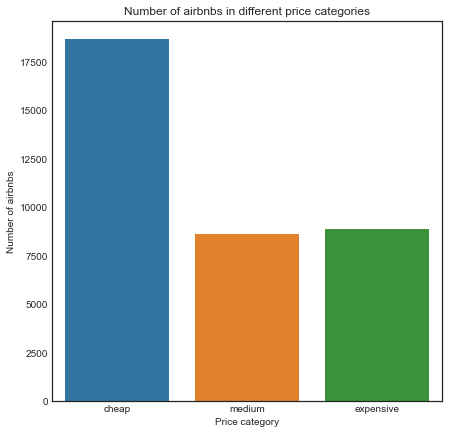

In [409]:
#plot the price categories
plt.figure(figsize = (7, 7))
ax = sns.countplot(x = airbnb_new['price_category'])
ax.set_ylabel(ylabel = 'Number of airbnbs')
ax.set_xlabel(xlabel = 'Price category')
ax.set_title(label = 'Number of airbnbs in different price categories')
plt.show()

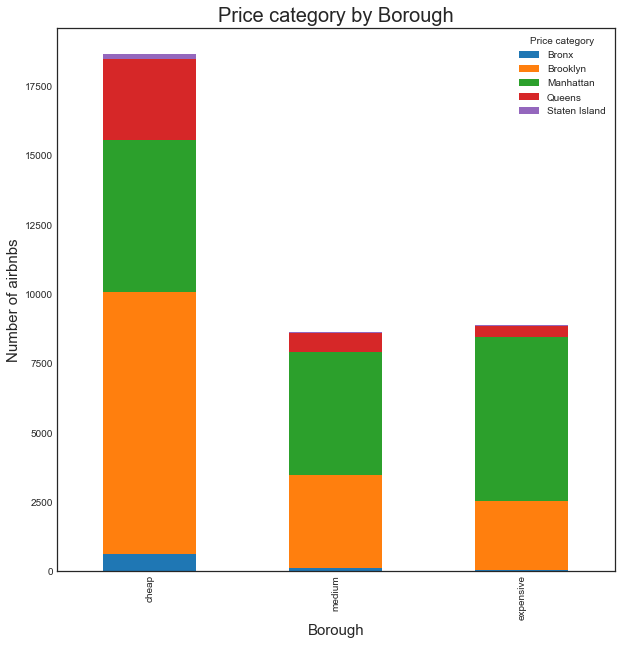

In [455]:
# plot a stackbar plot of price category by borough
airbnb_new.groupby(['price_category','neighbourhood_group']).size().unstack().plot(kind='bar',stacked=True,figsize=(10,10))
plt.title('Price category by Borough',fontsize=20)
plt.xlabel('Borough',fontsize=15)
plt.ylabel('Number of airbnbs',fontsize=15)
plt.legend(title='Price category')
plt.savefig('./plots/price_category_by_borough',bbox_inches='tight')


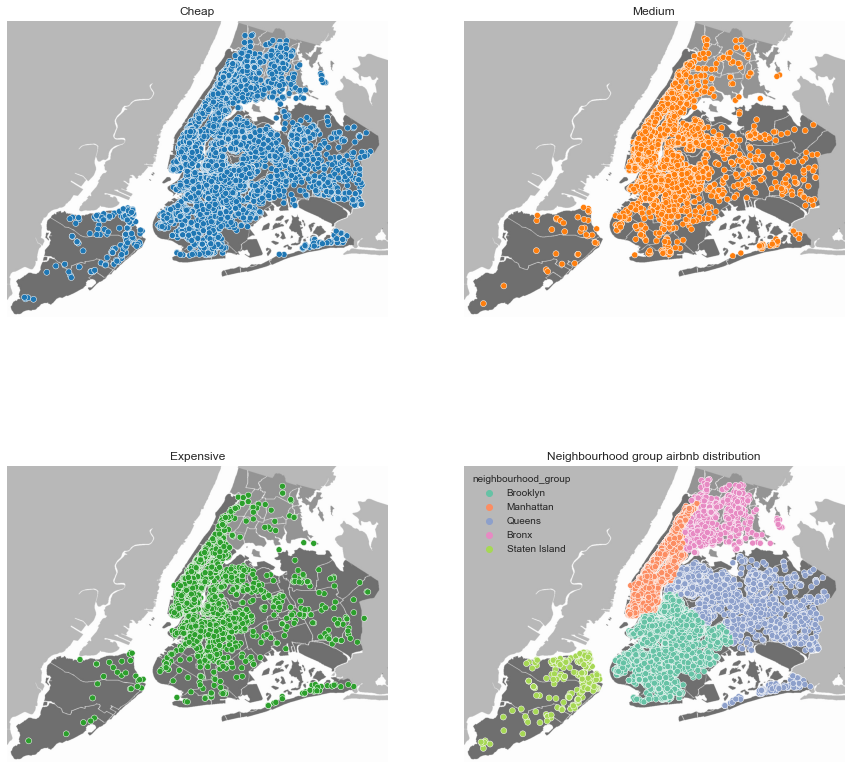

In [425]:
#Plot 3 plots of the latitude and longitude of airbnbs for cheap,medium and expensive
plt.subplots(figsize = (15,15))
ax=plt.subplot(221)
sns.scatterplot(x='longitude', y='latitude', data=airbnb_new[airbnb_new['price_category']=='cheap'],ax=ax,hue='price_category')
ax.set_title('Cheap')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
ax.get_legend().remove()

ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])
ax=plt.subplot(222)

sns.scatterplot(x='longitude', y='latitude', data=airbnb_new[airbnb_new['price_category']=='medium'],ax=ax,hue='price_category')
ax.set_title('Medium')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')

ax.get_legend().remove()

ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

ax=plt.subplot(223)
sns.scatterplot(x='longitude', y='latitude', data=airbnb_new[airbnb_new['price_category']=='expensive'],ax=ax,hue='price_category')
ax.set_title('Expensive')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
ax.get_legend().remove()
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

ax=plt.subplot(224)
sns.scatterplot(x='longitude', y='latitude', data=airbnb_new,ax=ax,hue='neighbourhood_group',palette='Set2')
ax.set_title('Neighbourhood group airbnb distribution')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

plt.savefig("./plots/nyc_price_cat_subplot.png",bbox_inches='tight')


In [411]:
#Give me some statistics on the price

airbnb_new['price'].describe()


count    36204.000000
mean       121.062120
std         69.302925
min         10.000000
25%         65.000000
50%        100.000000
75%        160.000000
max        346.000000
Name: price, dtype: float64

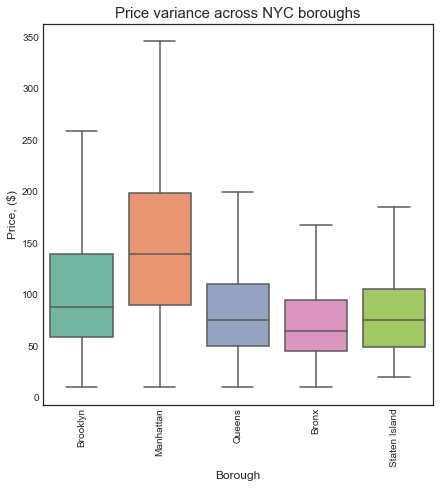

In [424]:

plt.figure(figsize = (7, 7))
ax = sns.boxplot(x = airbnb_new['neighbourhood_group'], y =airbnb_new['price'], data = airbnb_new, palette = 'Set2', showfliers = False)
ax.set_xlabel(xlabel = 'Borough',fontsize = 12)
ax.set_ylabel(ylabel = 'Price, ($)',fontsize = 12)
ax.set_title(label = 'Price variance across NYC boroughs',fontsize = 15)
plt.xticks(rotation = 90)
plt.savefig("./plots/nyc_price_dist_borough.png",bbox_inches='tight')
plt.show()


The average prices of Brooklyn,Queens and Statent Island is more are less the same which varies around 75-100 dollars
The prices are really high in Manhattan as the average price comes around 150 dollars and maximum reaches near 350 dollars
The prices in Bronx are comparatively low as it average price is around 60 dollars.

In [413]:
# the average price of airbnbs in each neighbourhood group

print(airbnb_new.groupby('neighbourhood_group')['price'].mean())


print('max')
print(airbnb_new.groupby('neighbourhood_group')['price'].max())


print('min')
print(airbnb_new.groupby('neighbourhood_group')['price'].min())




neighbourhood_group
Bronx             77.236000
Brooklyn         104.658664
Manhattan        147.469731
Queens            89.510580
Staten Island     90.274900
Name: price, dtype: float64
max
neighbourhood_group
Bronx            325
Brooklyn         345
Manhattan        346
Queens           340
Staten Island    300
Name: price, dtype: int64
min
neighbourhood_group
Bronx            10
Brooklyn         10
Manhattan        10
Queens           10
Staten Island    20
Name: price, dtype: int64


In [414]:

print('std')
print(airbnb_new.groupby('neighbourhood_group')['price'].std())

print('median')
print(airbnb_new.groupby('neighbourhood_group')['price'].median())

std
neighbourhood_group
Bronx            48.532555
Brooklyn         61.594972
Manhattan        71.252270
Queens           53.911577
Staten Island    60.935114
Name: price, dtype: float64
median
neighbourhood_group
Bronx             65.0
Brooklyn          88.0
Manhattan        139.0
Queens            75.0
Staten Island     75.0
Name: price, dtype: float64


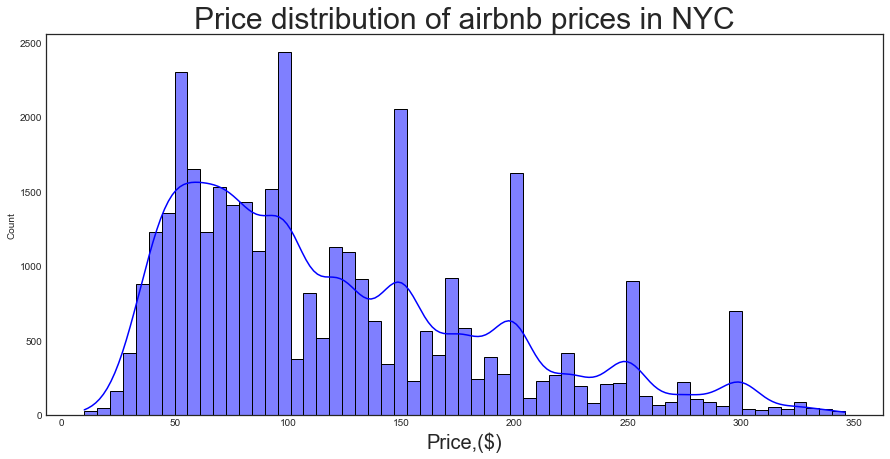

In [415]:
plt.figure(figsize = (15, 7))
sns.histplot(airbnb_new['price'], kde=True,color ='b')
plt.title('Price distribution of airbnb prices in NYC',fontsize=30)
plt.xlabel('Price,($)',fontsize=20)
plt.savefig("./plots/nyc_price_dist.png",bbox_inches='tight')


All the numerical factors are having right skewed distribution
Price factor has an unstable distribution

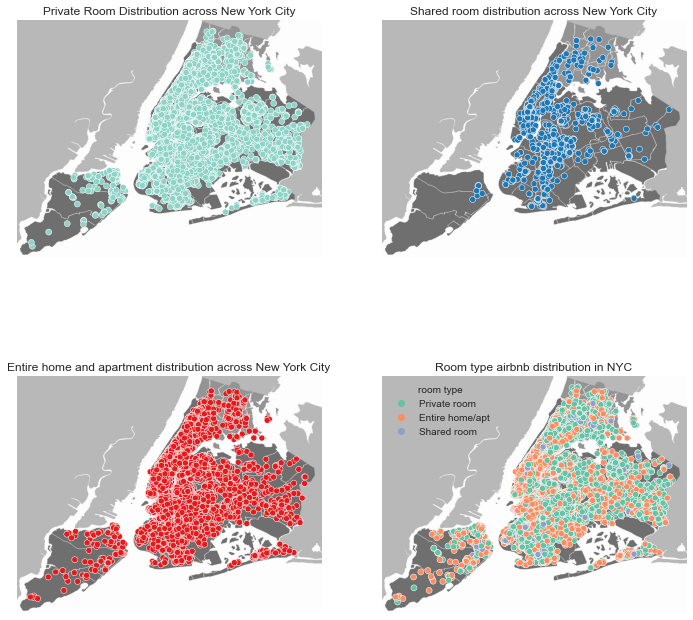

In [416]:
#distribution of room types across the boroughs



#Plot 3 plots of the latitude and longitude of airbnbs for cheap,medium and expensive
fig = plt.subplots(2,2,figsize = (12,12))
ax=plt.subplot(221)
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data= airbnb_new[airbnb_new['room_type']=='Private room'],ax=ax,palette='Set3')
ax.set_title('Private Room Distribution across New York City')
ax.axis('off')
ax.get_legend().remove()
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

ax=plt.subplot(222)
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data= airbnb_new[airbnb_new['room_type']=='Shared room'],ax=ax)
ax.set_title('Shared room distribution across New York City')

ax.axis('off')

ax.get_legend().remove()

ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

ax=plt.subplot(223)
sns.scatterplot(x='longitude', y='latitude', hue='room_type', data= airbnb_new[airbnb_new['room_type']=='Entire home/apt'],ax=ax,palette='Set1')
ax.set_title('Entire home and apartment distribution across New York City')

ax.axis('off')
ax.get_legend().remove()
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

ax=plt.subplot(224)
sns.scatterplot(x='longitude', y='latitude', data=airbnb_new,ax=ax,hue='room_type',palette='Set2')
ax.set_title('Room type airbnb distribution in NYC') 
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.axis('off')
ax.legend(loc='upper left', title = 'room type')
ax.imshow(img, extent = [-74.27099150000001, -73.6864185, 40.4791265, 40.9337235])

plt.savefig("./plots/nyc_room_types_dist",bbox_inches='tight')





Plot the correlation coefficients

In [417]:
airbnb_new.tail(10)

,host_id,host_name,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_category
48885,131529729,Kendall,Manhattan,40.79633,-73.93605,Private room,75,2,0,0.0,2,353,cheap
48886,274311461,Scott,Manhattan,40.75561,-73.96723,Entire home/apt,200,6,0,0.0,1,176,expensive
48887,208514239,Melki,Brooklyn,40.71232,-73.94220,Entire home/apt,170,1,0,0.0,3,365,expensive
48888,274321313,Kat,Manhattan,40.76392,-73.99183,Private room,125,4,0,0.0,1,31,medium
48889,107716952,Michael,Queens,40.69137,-73.80844,Private room,65,1,0,0.0,2,163,cheap
48890,8232441,Sabrina,Brooklyn,40.67853,-73.94995,Private room,70,2,0,0.0,2,9,cheap
48891,6570630,Marisol,Brooklyn,40.70184,-73.93317,Private room,40,4,0,0.0,2,36,cheap
48892,23492952,Ilgar & Aysel,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,0.0,1,27,medium
48893,30985759,Taz,Manhattan,40.75751,-73.99112,Shared room,55,1,0,0.0,6,2,cheap
48894,68119814,Christophe,Manhattan,40.76404,-73.98933,Private room,90,7,0,0.0,1,23,cheap


In [444]:
# What percentage of properties are labelled cheap

cheap = airbnb_new[airbnb_new['price_category']=='cheap']
cheap = cheap.shape[0]/airbnb_new.shape[0]*100

medium = airbnb_new[airbnb_new['price_category']=='medium']
medium = medium.shape[0]/airbnb_new.shape[0]*100

expensive = airbnb_new[airbnb_new['price_category']=='expensive']
expensive = expensive.shape[0]/airbnb_new.shape[0]*100


print(cheap)
print(medium)
print(expensive)





51.57441166721909
23.86752844989504
24.558059882885868


In [419]:
airbnb_new.isnull().sum()

host_id                           0
host_name                         0
neighbourhood_group               0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
price_category                    0
dtype: int64

A final change is to split the neighbourhood so it has just the borough
Add this col to the final table

In [ ]:
# plot a pie chart of room type
plt.figure(figsize = (7, 7))
plt.title('Room type distribution in NYC',fontsize=20)



/var/folders/0n/_mlbrn4d5yx15c7r4016pgzh0000gn/T/ipykernel_24124/3413789041.py:10: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./plots/nc_room_pie.png',bbox = 'tight')


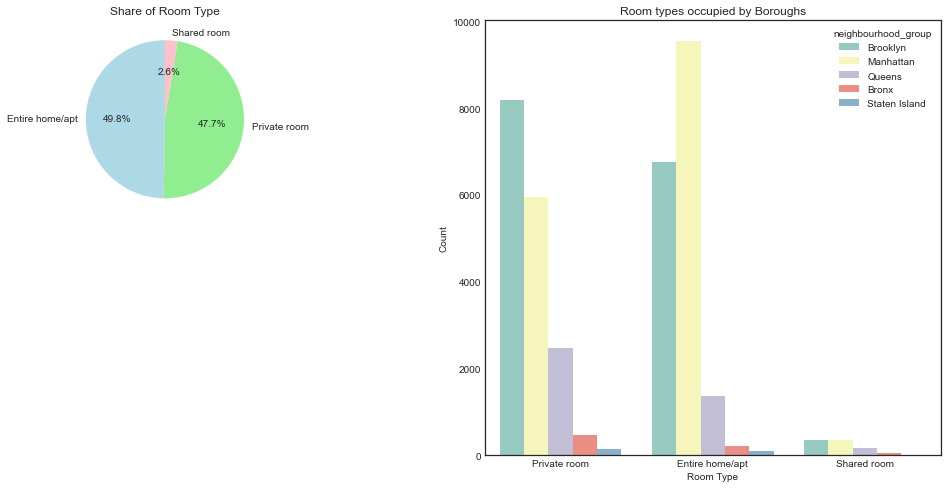

In [443]:
plt.subplots(2,1,figsize=(18,8))
ax=plt.subplot(221)
plt.pie(airbnb_new['room_type'].value_counts(), labels = airbnb_new['room_type'].value_counts().index, autopct='%1.1f%%', startangle=90, colors = ['lightblue', 'lightgreen', 'pink'])  
ax.set_title('Share of Room Type')
ax=plt.subplot(122)
sns.countplot(x = 'room_type',hue = "neighbourhood_group",data = airbnb_new,palette="Set3")
ax.set_title('Room types occupied by Boroughs')
ax.set_xlabel('Room Type')
ax.set_ylabel('Count')
plt.savefig('./plots/nc_room_pie.png',bbox = 'tight')

/var/folders/0n/_mlbrn4d5yx15c7r4016pgzh0000gn/T/ipykernel_24124/20591410.py:8: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error in 3.6
  plt.savefig('./plots/nyc_room_price_cat.png',bbox = 'tight')


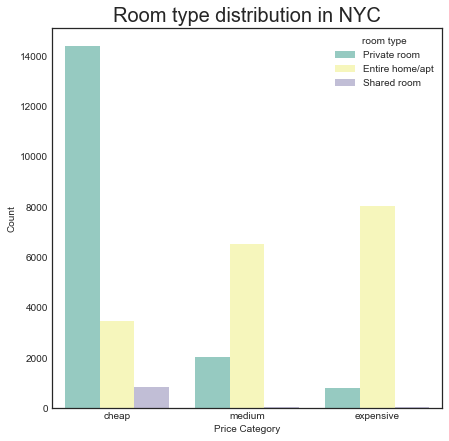

In [449]:
# Distribution of price_category and room type
plt.figure(figsize = (7, 7))
plt.title('Room type distribution in NYC',fontsize=20)
sns.countplot(x = 'price_category',hue = "room_type",data = airbnb_new,palette="Set3")
plt.xlabel('Price Category')
plt.legend(loc='upper right', title = 'room type')
plt.ylabel('Count')
plt.savefig('./plots/nyc_room_price_cat.png',bbox = 'tight')

Very less(2.7%) people prefer shared room, may be people are not comfortable to stay with strangers in NY
More than 8000 people in Manhattan prefer Entire home/ apartment
Nearly around 8000 people in Brooklyn prefer private room
People in Staten island seldom book through airbnb

In [458]:
# remove punctuation from host_name

airbnb_new['host_name'] = airbnb_new['host_name'].str.replace('[^\w\s]','')


/var/folders/0n/_mlbrn4d5yx15c7r4016pgzh0000gn/T/ipykernel_24124/3441368060.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  airbnb_new['host_name'] = airbnb_new['host_name'].str.replace('[^\w\s]','')


In [459]:
airbnb_new.to_csv('airbnb_new.csv',index=False)

Logistic regression and classification here